In [12]:
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(parent_dir)

from functions.read_g4bl_data import readTraceData
from functions.set_plot_settings import setPlotSettings

setPlotSettings(font=True)

# Location of G4bl output:
sim_dir = 'sim10/'
file = sim_dir+'AllTracks.txt'

# Define RF period:
f = 325*10**6 # MHz
T = 1/f*10**9 # ns

# Length of period:
len_period = 4200 # mm

# Figure directory:
fig_dir = 'figures/'

In [13]:
# Read in data:
data = readTraceData(file)
x_vals = data['x'].values; y_vals = data['y'].values; z_vals = data['z'].values # mm
px_vals = data['px'].values; py_vals = data['py'].values; pz_vals = data['pz'].values; ptotal_vals = data['ptotal'].values # MeV/c
t_vals = data['t'].values # ns
Bx_vals = data['Bx'].values; By_vals = data['By'].values; Bz_vals = data['Bz'].values # T
Lz_vals = data['Lz'] # mm*MeV/c

# Find indices for first value in each period:
next_z = 0; period_start_z_vals = []; period_start_indices = []
for i in range(len(z_vals)):
    if z_vals[i] > next_z:
        period_start_z_vals.append(z_vals[i])
        period_start_indices.append(i)
        next_z += len_period

In [14]:
# Verify reference particle momentum:
print(f'p = {ptotal_vals[0]}')

p = 246.389


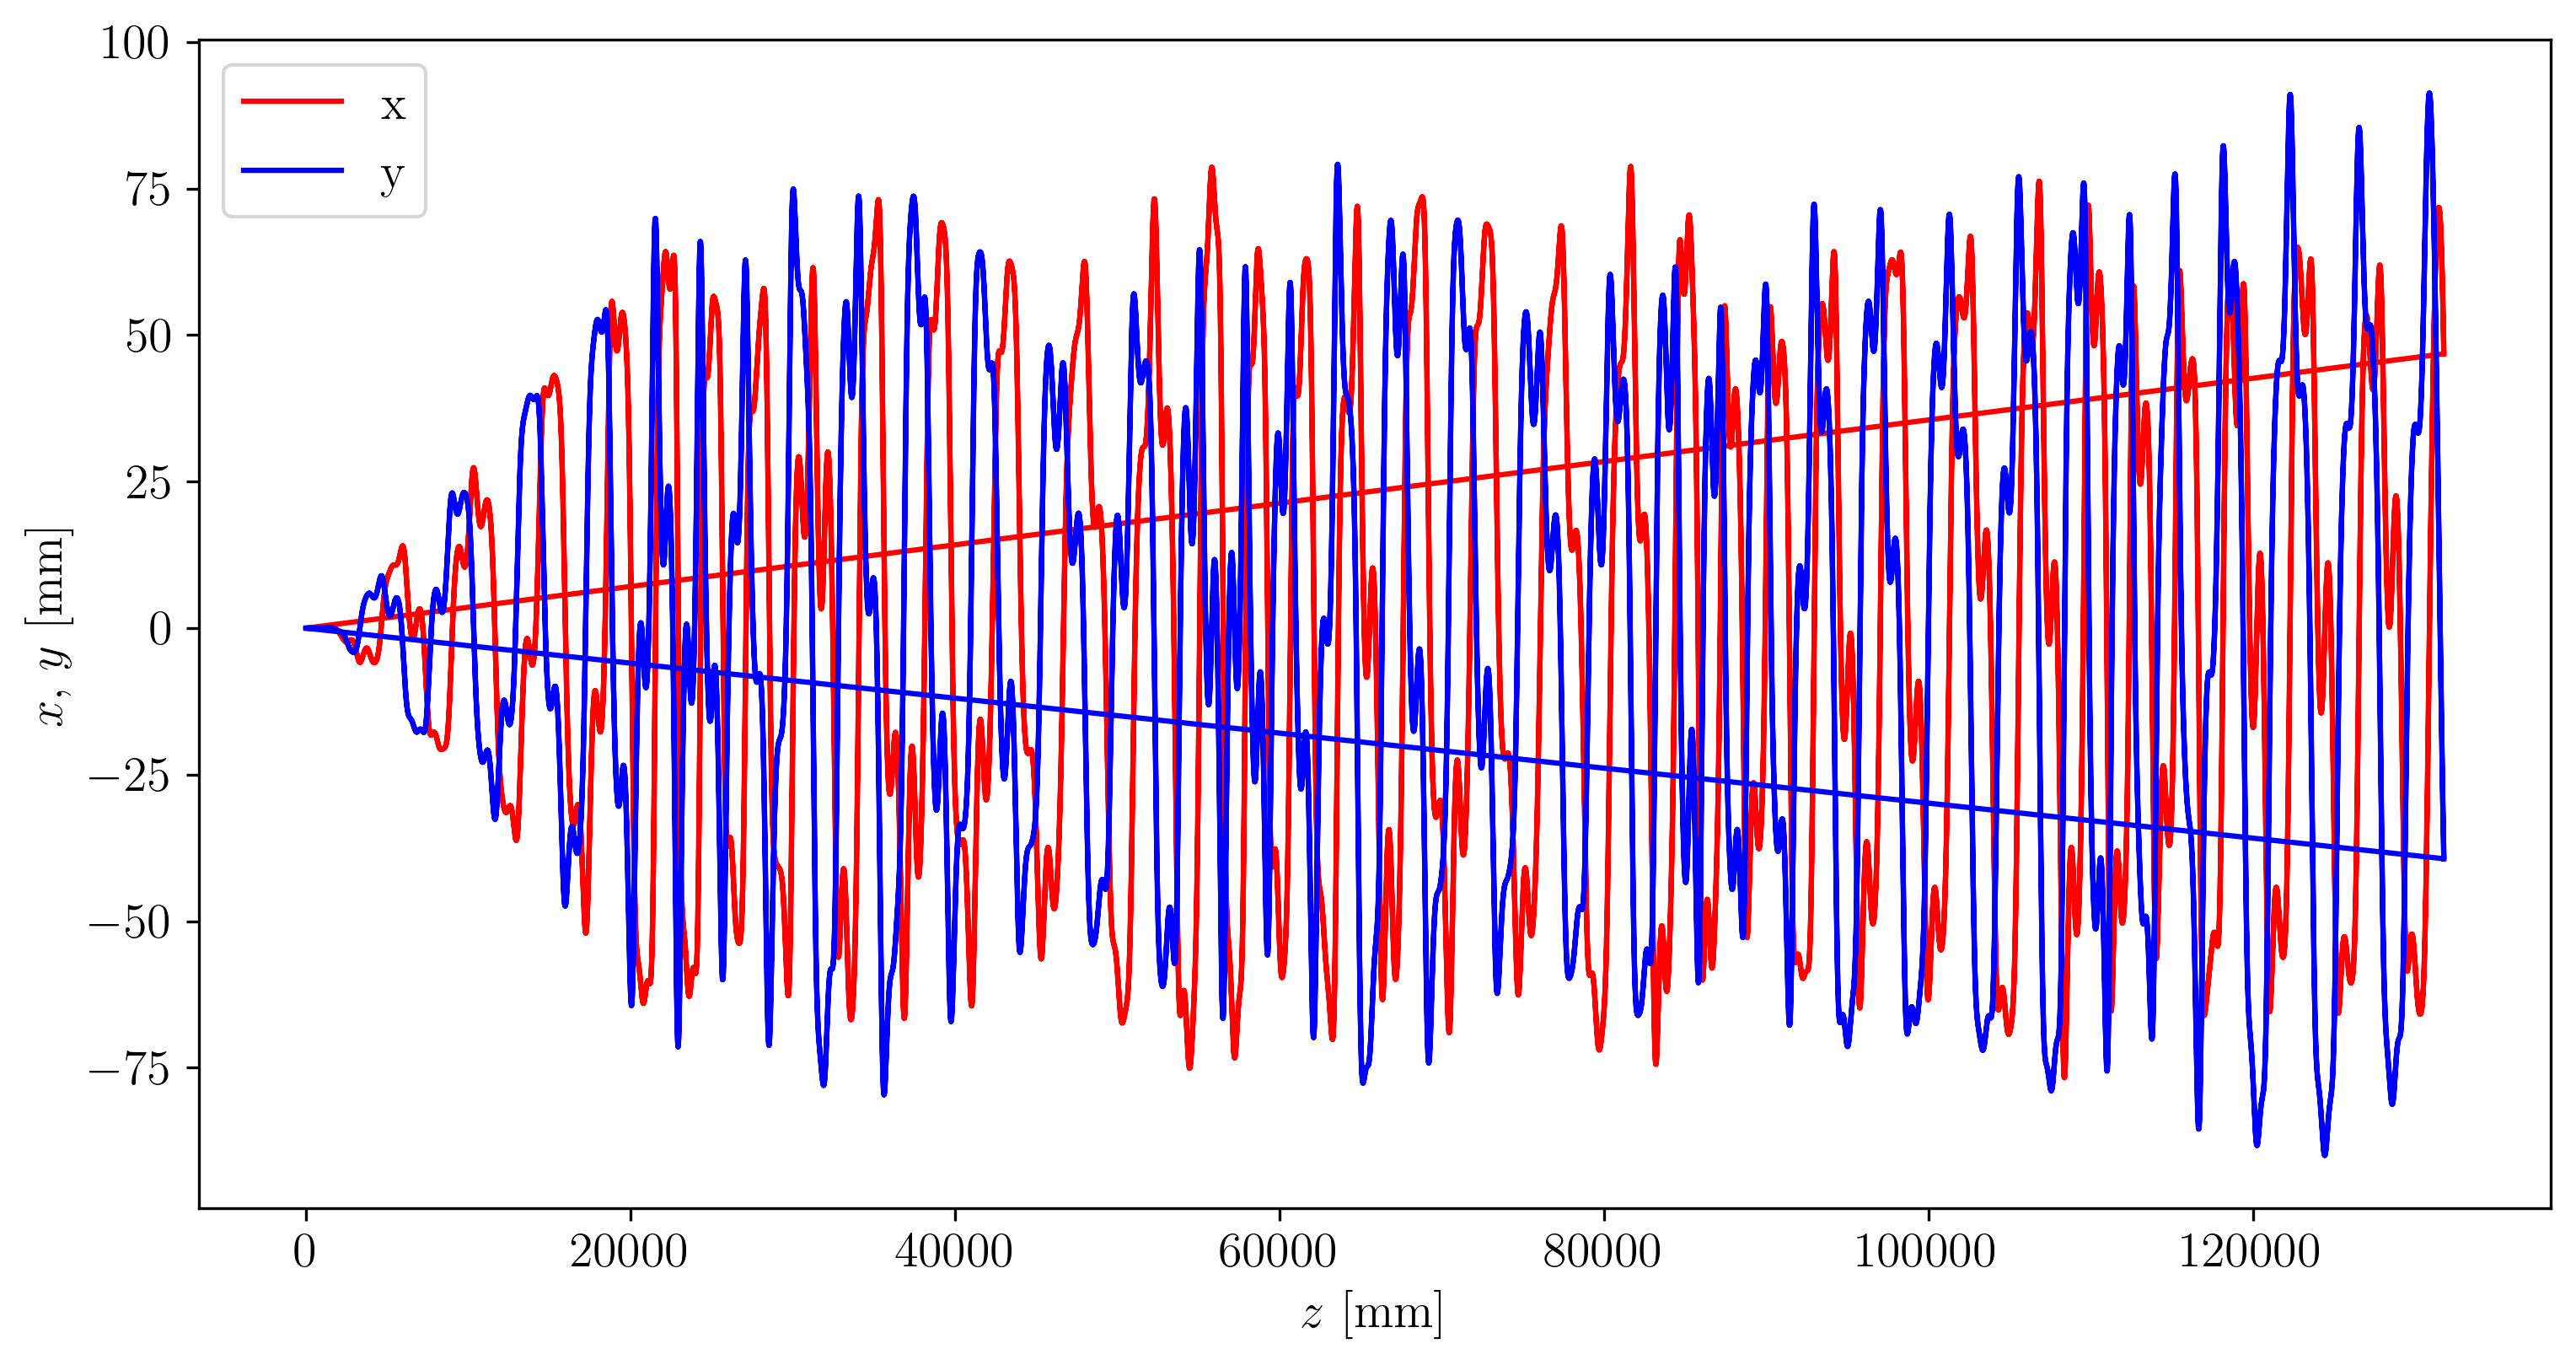

In [15]:
# Plot x, y along z:
plt.figure(figsize = (12,6))
plt.plot(z_vals,x_vals,color='red',label='x')
plt.plot(z_vals,y_vals,color='blue',label='y')
plt.xlabel('$z$ [mm]')
plt.ylabel('$x$, $y$ [mm]')
plt.legend()
plt.show()

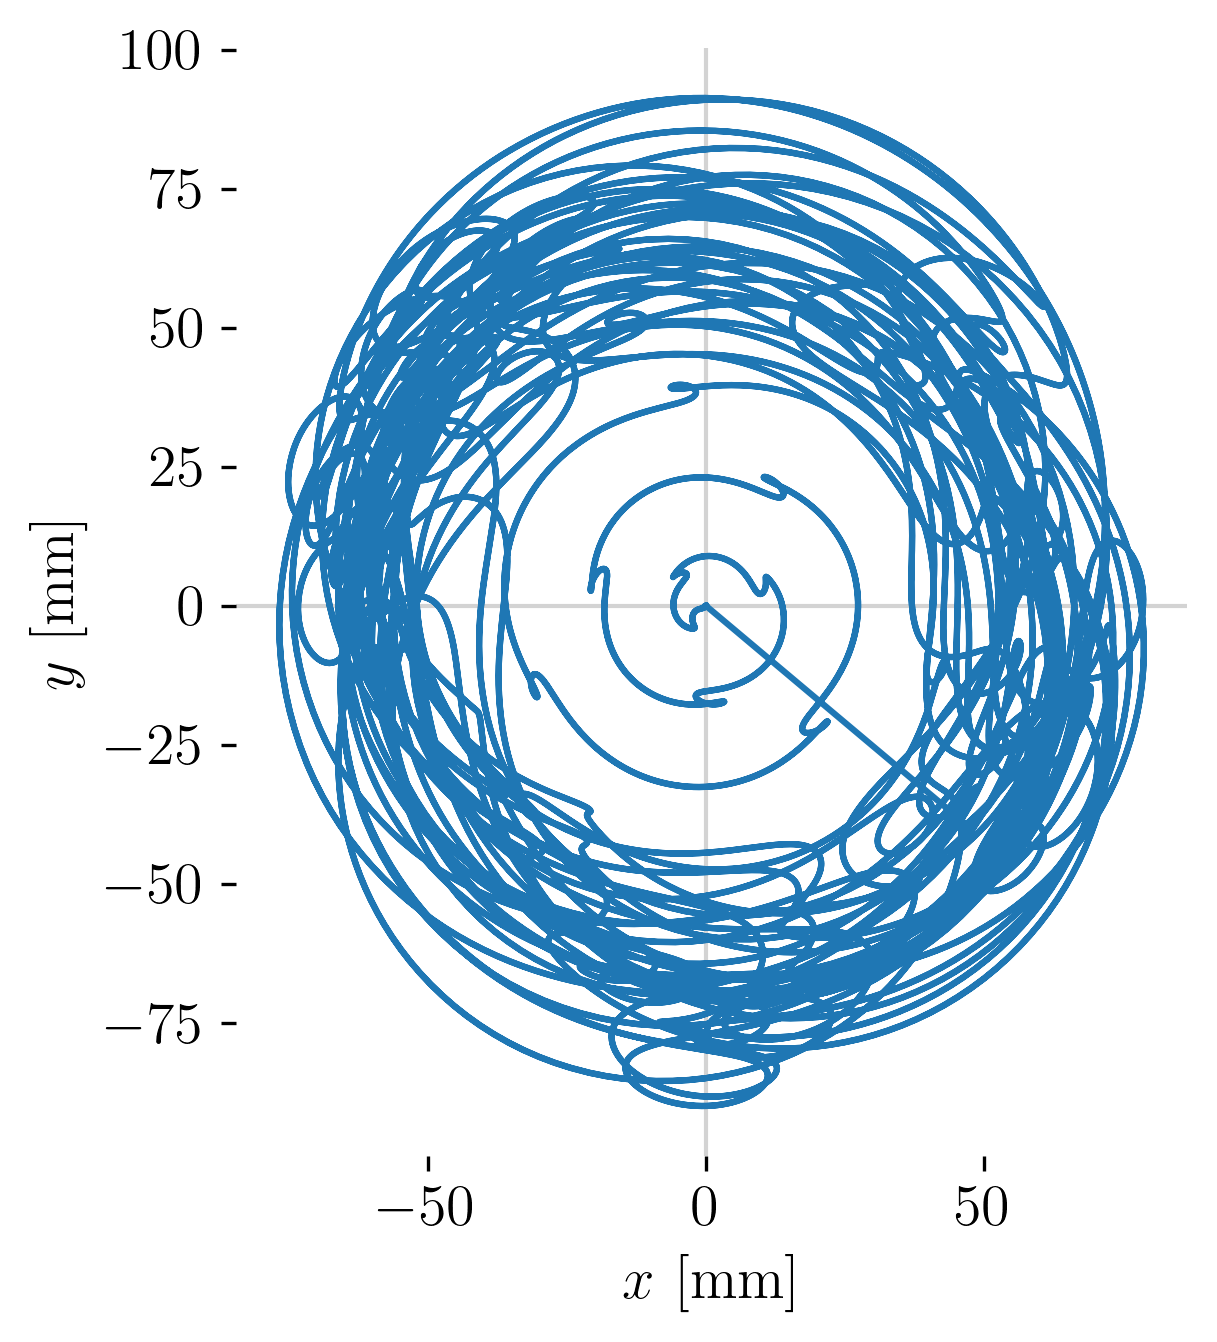

In [16]:
# Plot projection in x-y plane (for periodic section only):
fig, ax = plt.subplots()
# plt.plot(x_vals[period_start_indices[2]:],y_vals[period_start_indices[2]:],color='black',linewidth=1)
plt.plot(x_vals, y_vals)
for spine in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[spine].set_visible(False)
plt.axhline(0, color='lightgray', linewidth=1, zorder=-10)
plt.axvline(0, color='lightgray', linewidth=1, zorder=-10)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
ax.set_aspect('equal')
plt.show()

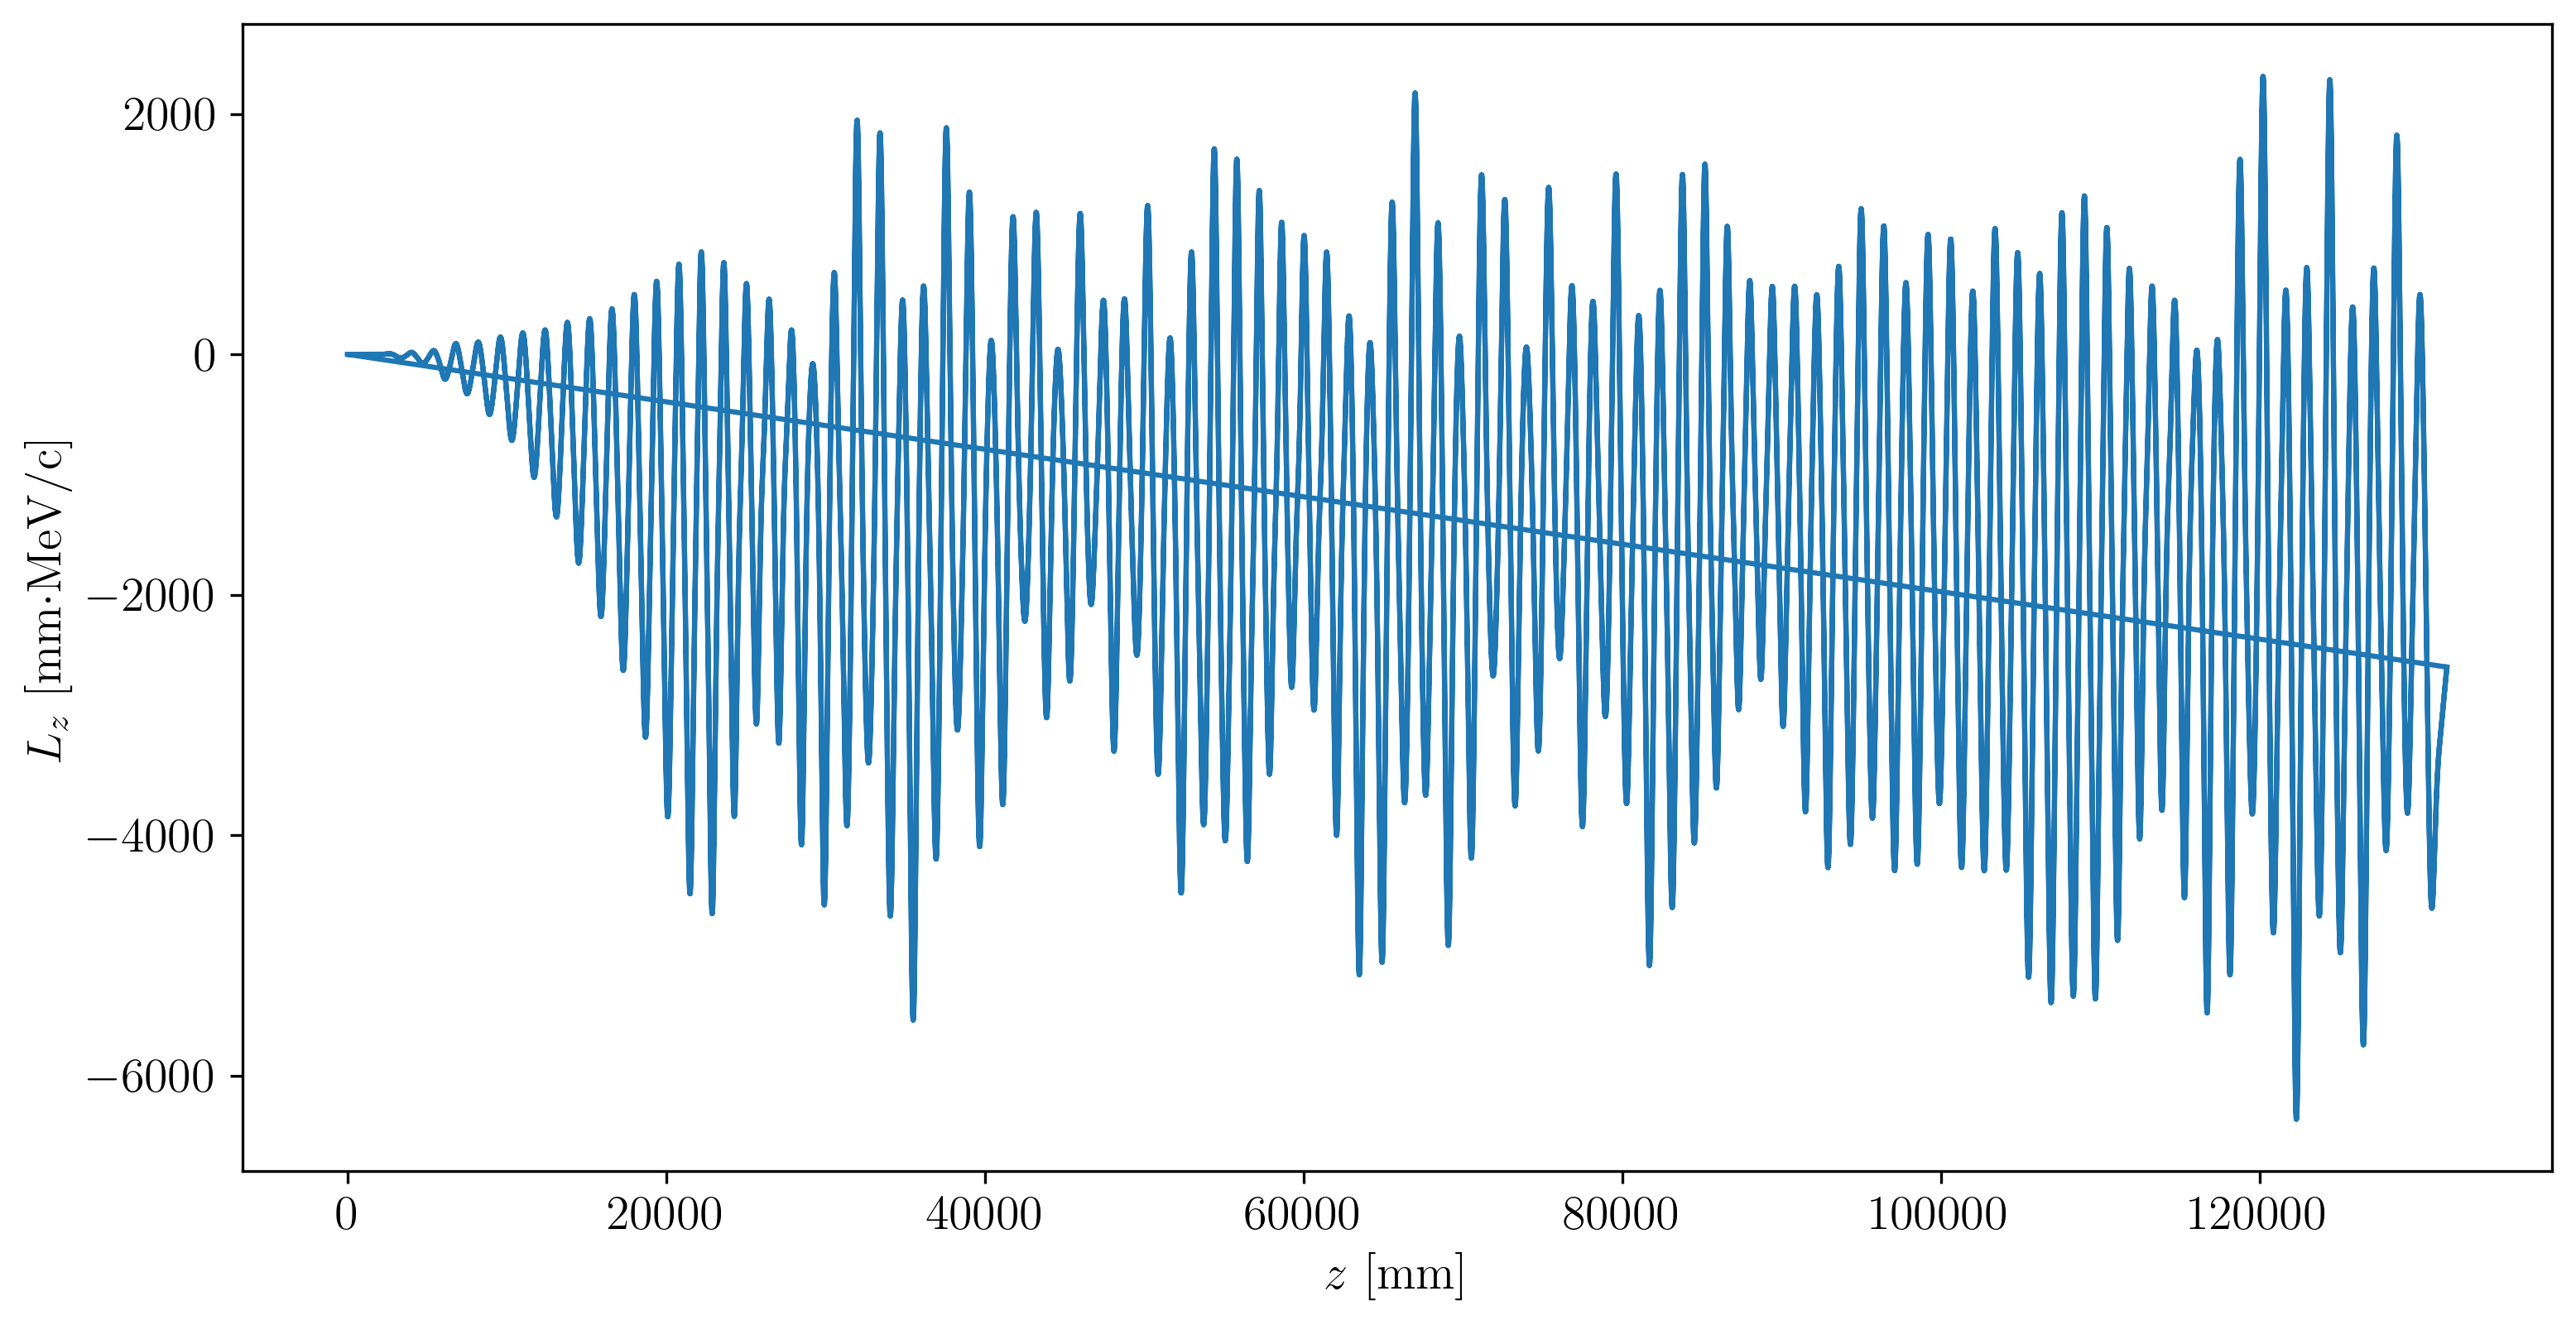

In [17]:
# Plot L_z along z:
plt.figure(figsize = (12,6))
plt.plot(z_vals,Lz_vals)
plt.xlabel('$z$ [mm]')
plt.ylabel(r'$L_z$ [mm$\cdot$MeV/c]')
plt.show()

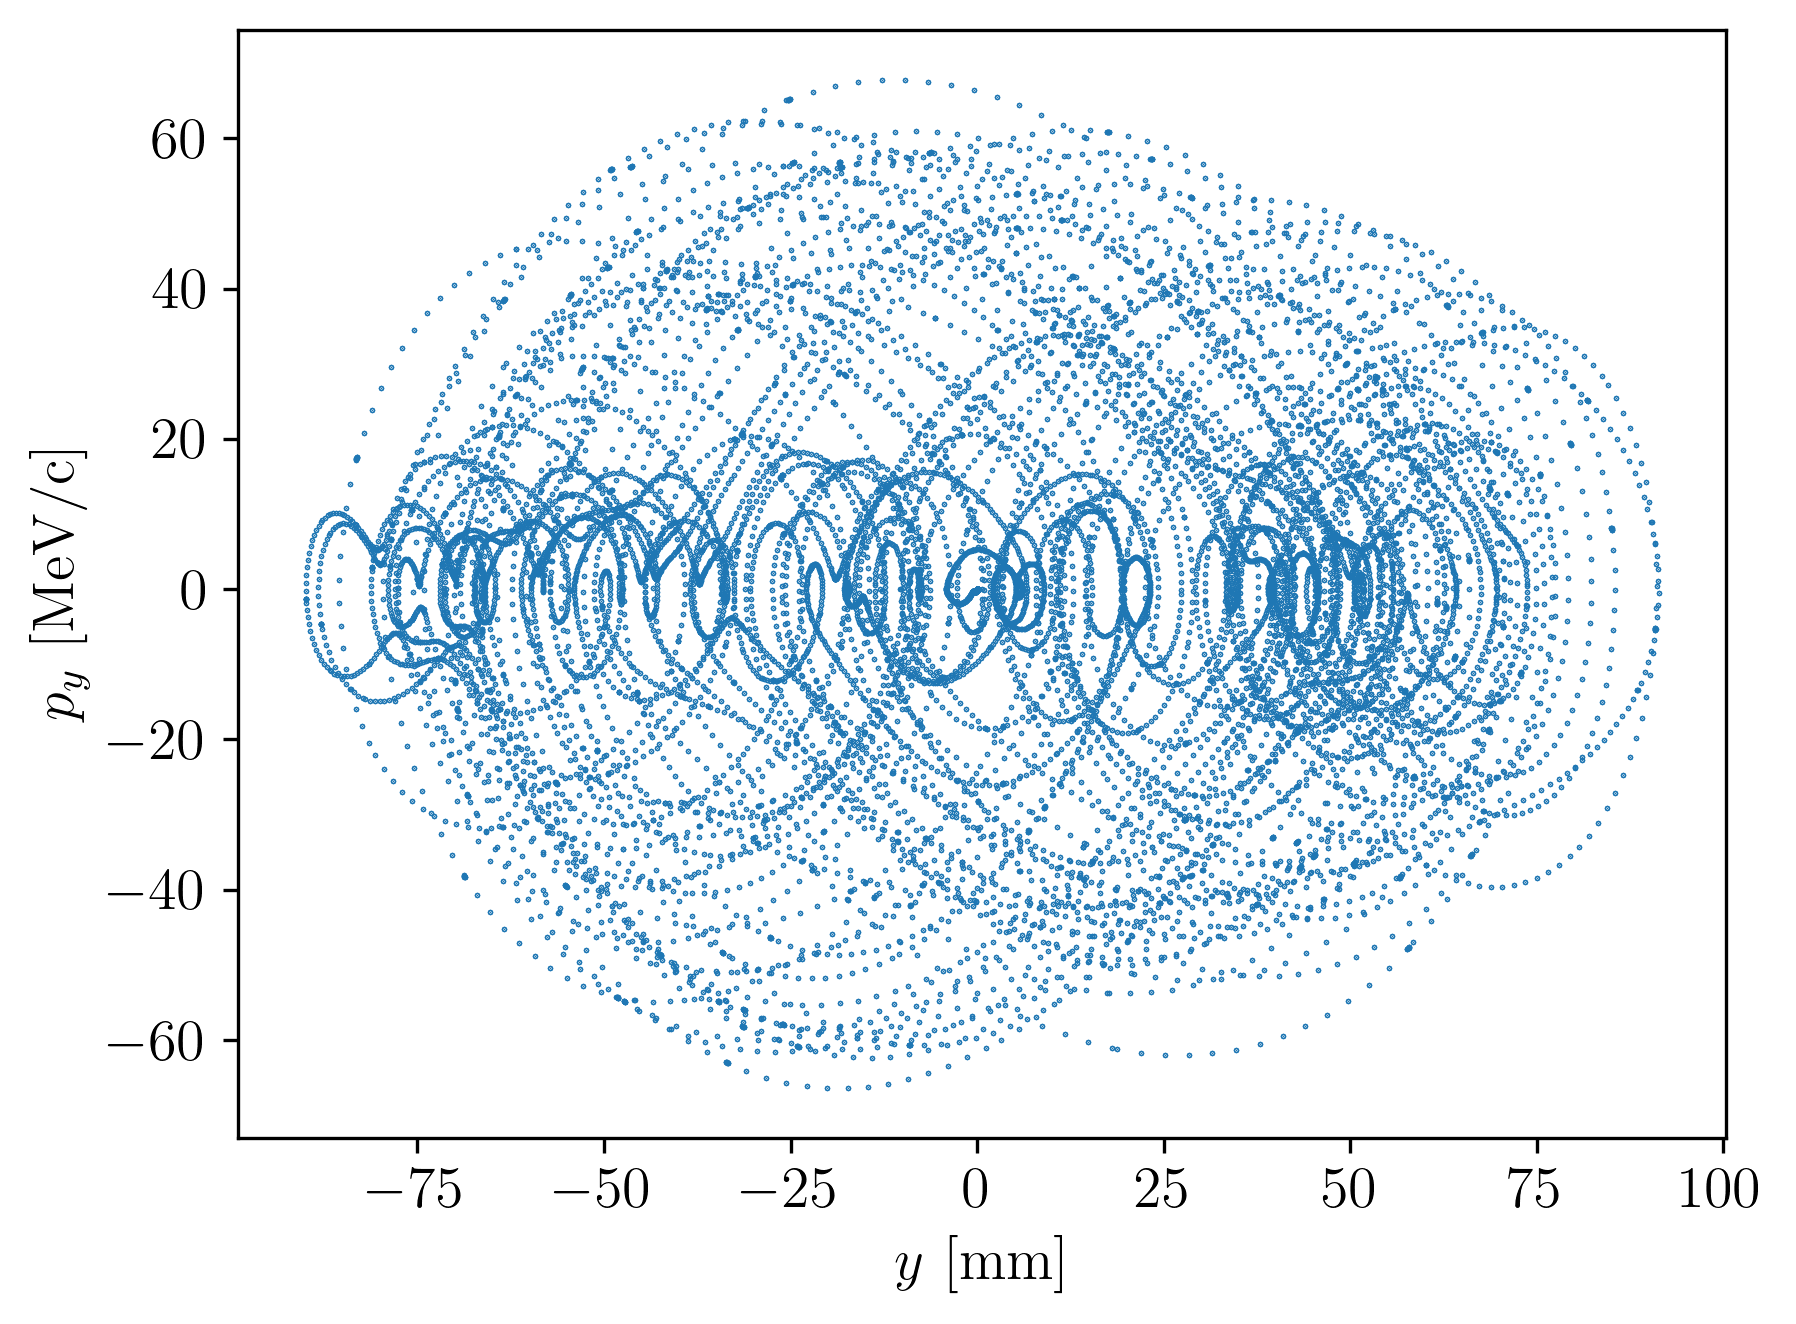

In [18]:
# Plot phase space trajectory (y):
plt.figure()
plt.scatter(y_vals,py_vals,s=0.1)
plt.xlabel('$y$ [mm]')
plt.ylabel('$p_y$ [MeV/c]')
plt.show()

### Single period plots

In [19]:
start = 7

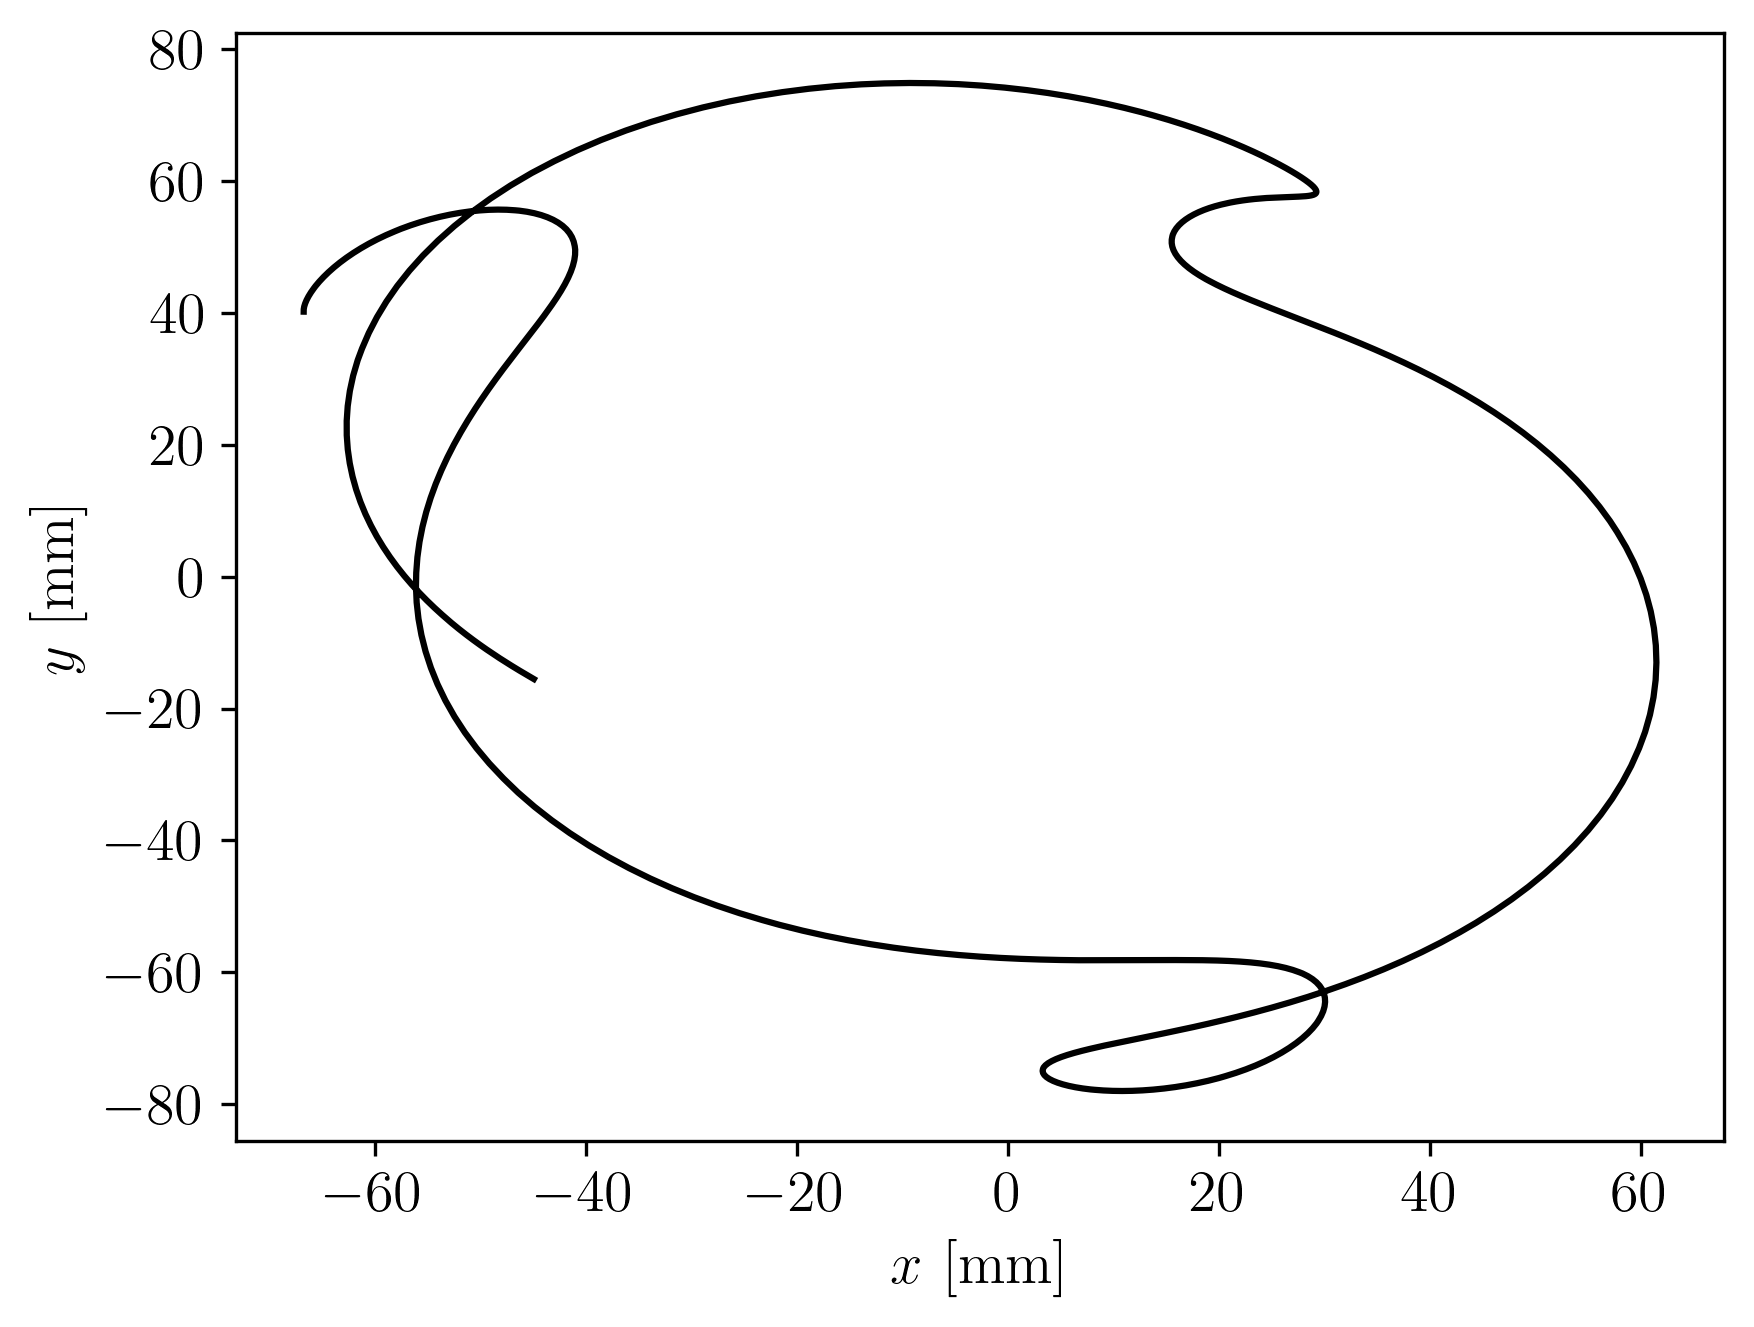

In [20]:
# Plot projection in x-y plane (for single period):
plt.figure()
plt.plot(x_vals[period_start_indices[start]:period_start_indices[start+1]],y_vals[period_start_indices[start]:period_start_indices[start+1]],color='black')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.show()

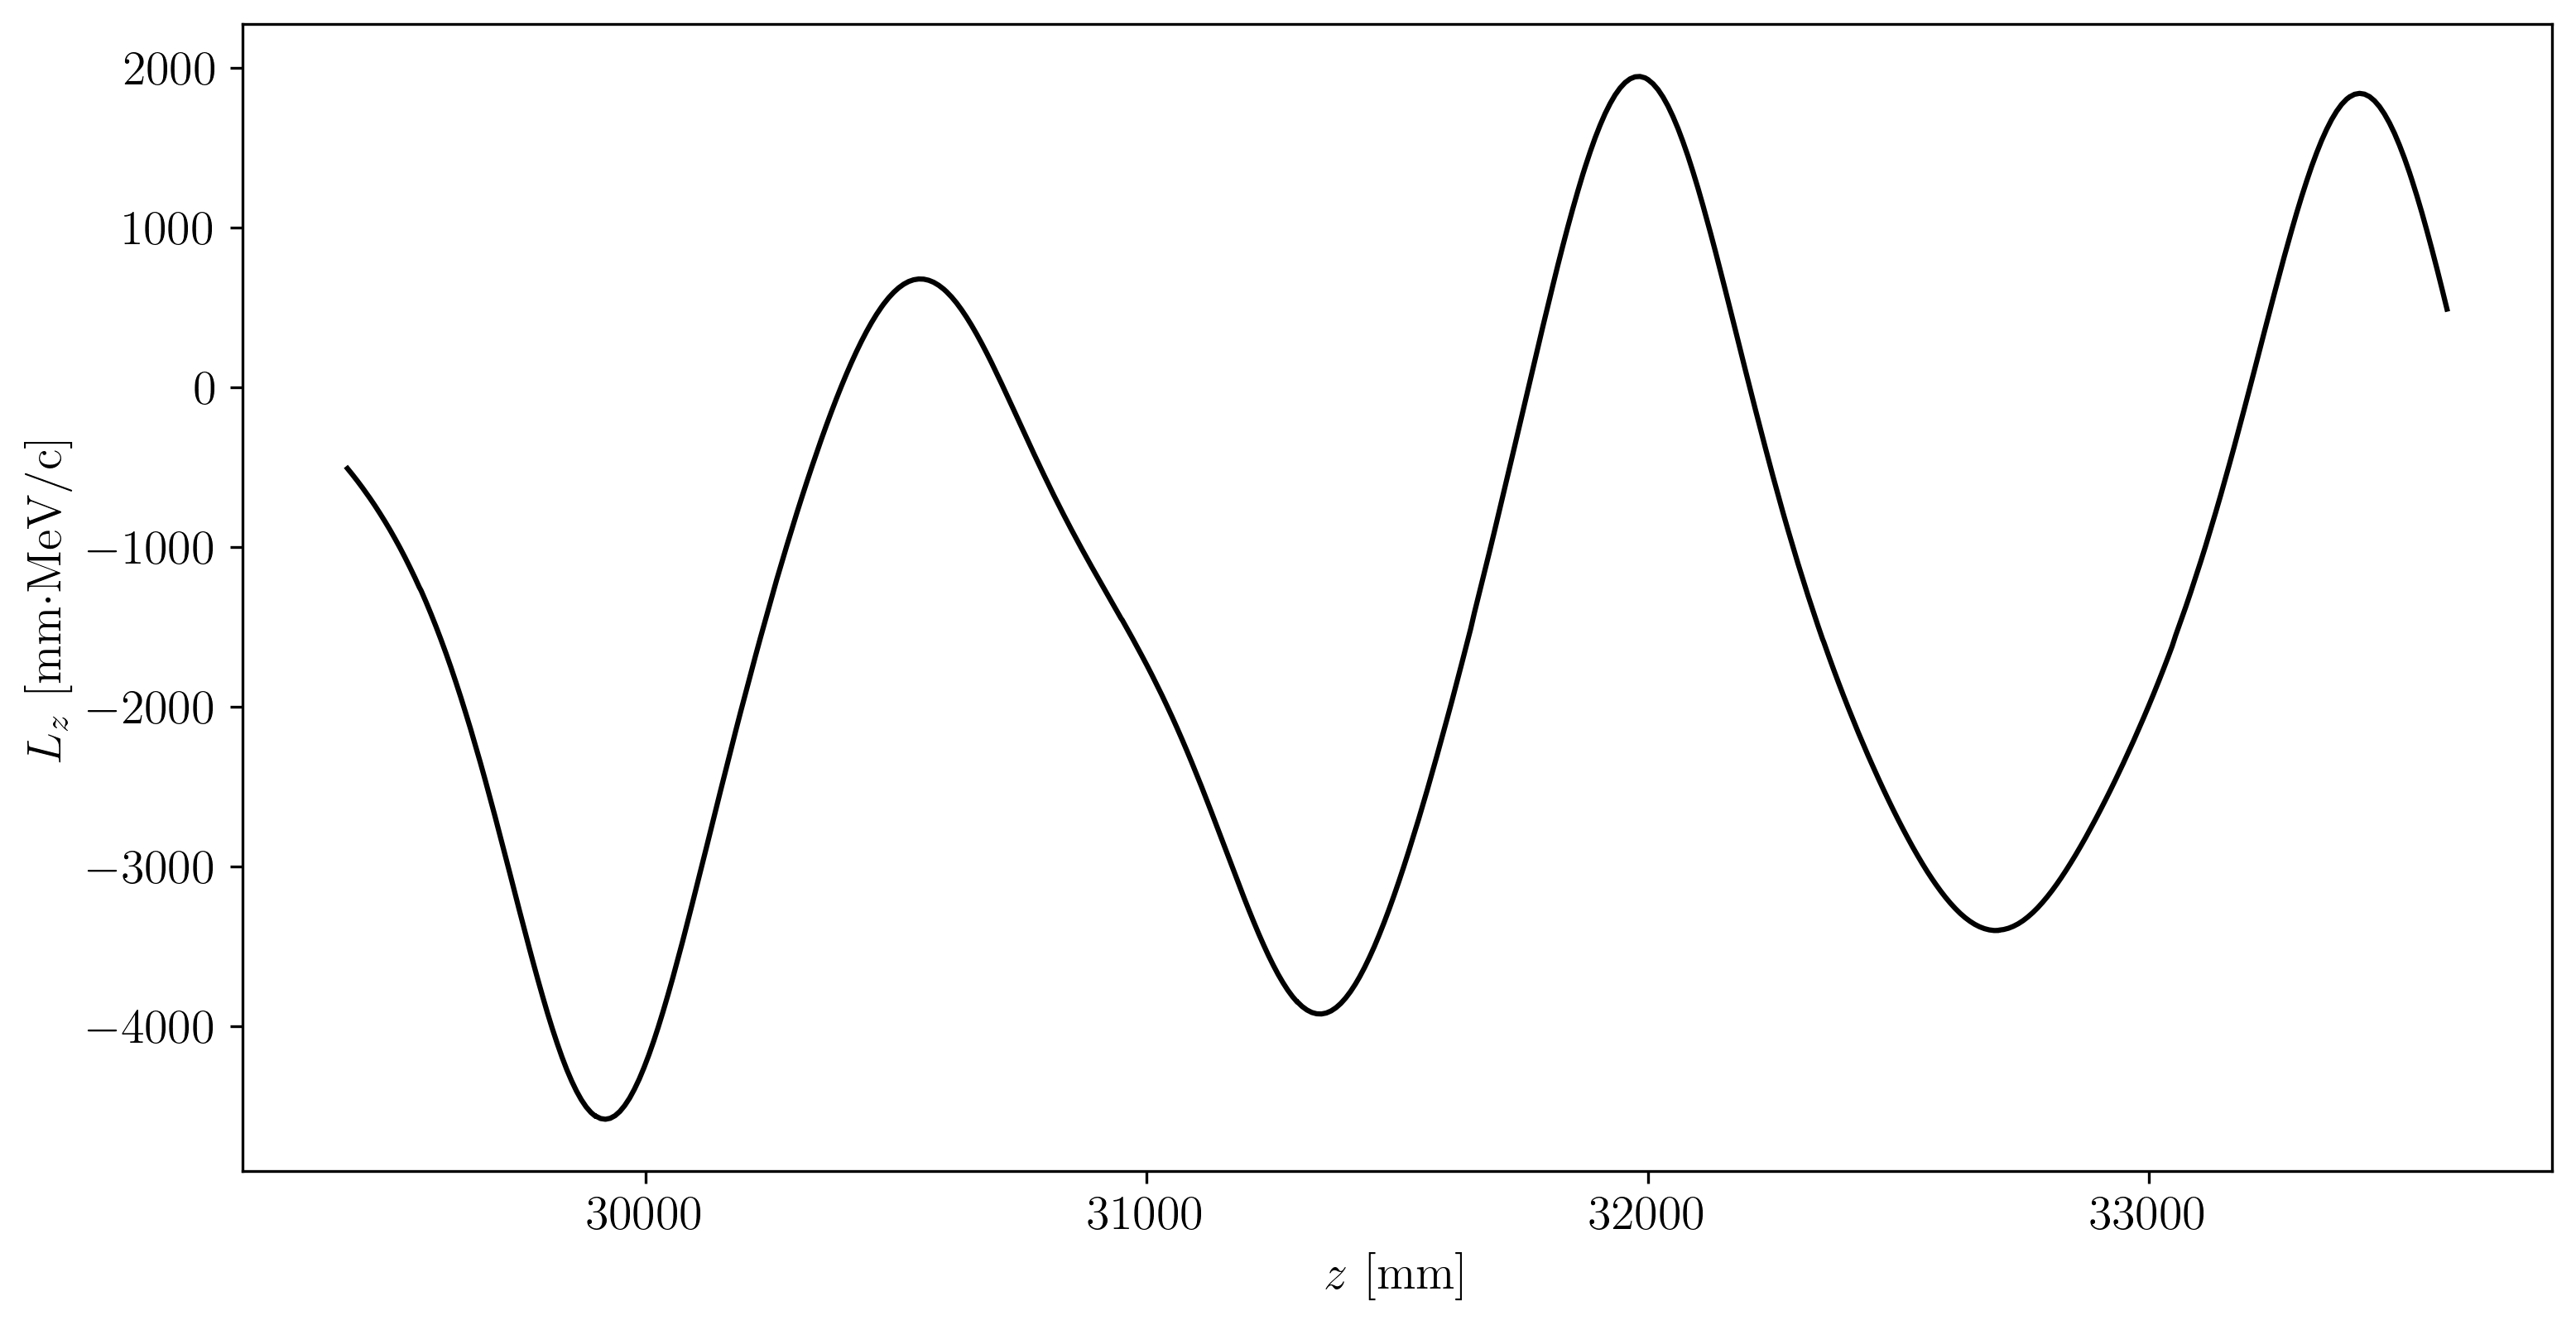

In [21]:
# Plot L_z along z:
plt.figure(figsize = (12,6))
plt.plot(z_vals[period_start_indices[start]:period_start_indices[start+1]],Lz_vals[period_start_indices[start]:period_start_indices[start+1]],color='black')
plt.xlabel('$z$ [mm]')
plt.ylabel(r'$L_z$ [mm$\cdot$MeV/c]')
plt.show()